In [1]:
import numpy as np
from skimage import feature as skif
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from tqdm import tqdm

In [2]:
# Calcul de l'histograme LBP

def lbp_histogram(image, P=8, R=1, method='nri_uniform'):
    lbp = skif.local_binary_pattern(image, P,R, method) # lbp.shape is equal image.shape
    # cv2.imwrite("lbp.png",lbp)
    # plt.imshow(lbp)
    max_bins = int(lbp.max() + 1) # max_bins is related P
    hist, _ = np.histogram(lbp,  density=True, bins=max_bins, range=(0, max_bins))
    return lbp, hist

In [3]:
# Calcul de LBP pour un tableau d'images

def compute_lpb(path, file_name, label):
    file_list = [ f for f in os.listdir(path) if os.path.isfile(os.path.join(path,f)) ]
    feature_label = []
    with tqdm(total=len(file_list), desc="Traitement en cour ...", bar_format="{l_bar}{bar} [ time left: {remaining} ]") as pbar:
        for line in file_list:
            image_path = path + line
            image = cv.imread(image_path)
            image = cv.cvtColor(image, cv.COLOR_BGR2YCrCb)
            lbp_y, y_h = lbp_histogram(image[:,:,0]) # y channel
            lbp_cb, cb_h = lbp_histogram(image[:,:,1]) # cb channel
            lbp_cr, cr_h = lbp_histogram(image[:,:,2]) # cr channel
            feature = np.concatenate((y_h, cb_h, cr_h))
            if len(feature) == 177:
                feature_label.append(np.append(feature, np.array(label)))
            pbar.update(1)
    np.save(file_name,np.array(feature_label, dtype=object))

# Visualisation sur une image

59


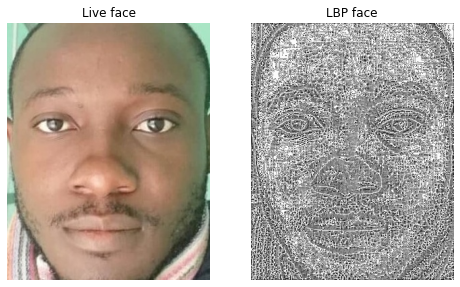

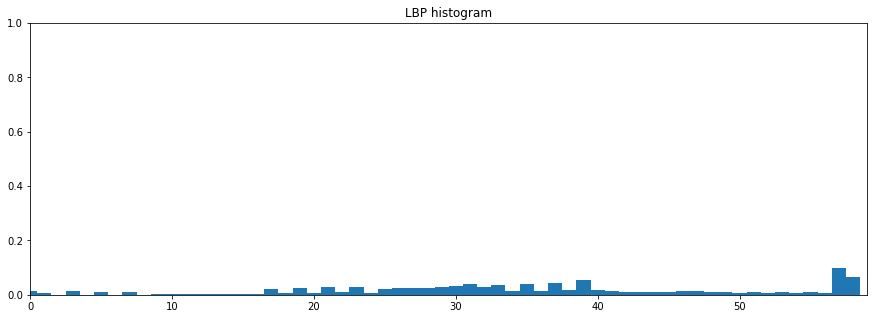

In [4]:
# Essaie sur une image

image = cv.imread('visage.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
lbp, histogramme = lbp_histogram(cv.cvtColor(image, cv.COLOR_RGB2GRAY))

print(len(histogramme))

plt.figure(figsize=(8, 8))

ax = plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Live face')
plt.axis("off")

ax = plt.subplot(1, 2, 2)
plt.imshow(lbp, cmap='gray')
plt.title('LBP face')
plt.axis("off")
plt.show()

plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(histogramme)), histogramme, width=1)
plt.axis([0, len(histogramme), 0, 1])
plt.title('LBP histogram')
plt.show()

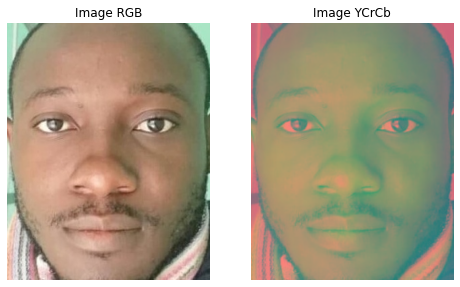

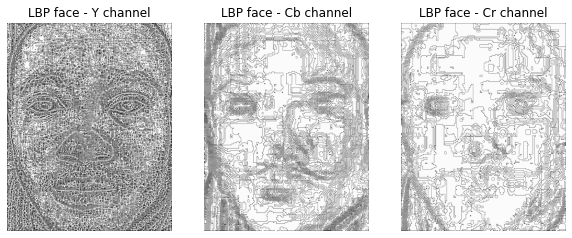

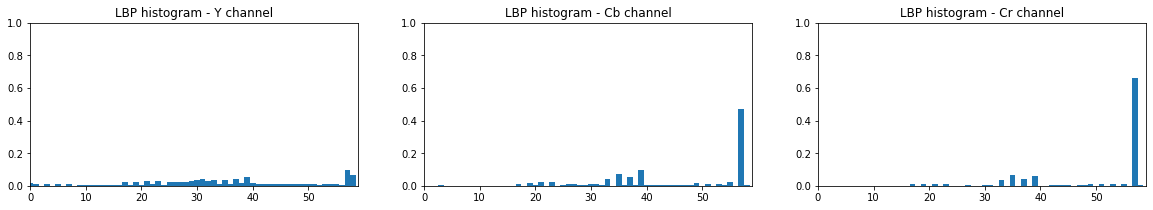

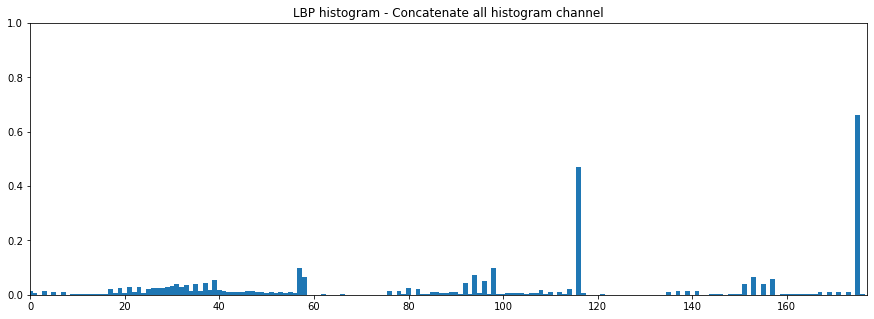

In [5]:
image_path = "visage.jpg"
image = cv.imread(image_path)
image = cv.cvtColor(image, cv.COLOR_BGR2YCrCb)
lbp_y, y_h = lbp_histogram(image[:,:,0]) # y channel
lbp_cb, cb_h = lbp_histogram(image[:,:,1]) # cb channel
lbp_cr, cr_h = lbp_histogram(image[:,:,2]) # cr channel
feature = np.concatenate((y_h, cb_h, cr_h))

plt.figure(figsize=(8, 8))

ax = plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_YCrCb2RGB))
plt.title('Image RGB')
plt.axis("off")

ax = plt.subplot(1, 2, 2)
plt.imshow(image)
plt.title('Image YCrCb')
plt.axis("off")
plt.show()



plt.figure(figsize=(10, 6))

ax = plt.subplot(1, 3, 1)
plt.imshow(lbp_y, cmap='gray')
plt.title('LBP face - Y channel')
plt.axis("off")

ax = plt.subplot(1, 3, 2)
plt.imshow(lbp_cb, cmap='gray')
plt.title('LBP face - Cb channel')
plt.axis("off")

ax = plt.subplot(1, 3, 3)
plt.imshow(lbp_cr, cmap='gray')
plt.title('LBP face - Cr channel')
plt.axis("off")
plt.show()



plt.figure(figsize=(20, 3))

ax = plt.subplot(1, 3, 1)
plt.bar(np.arange(len(y_h)), y_h, width=1)
plt.axis([0, len(y_h), 0, 1])
plt.title('LBP histogram - Y channel')

ax = plt.subplot(1, 3, 2)
plt.bar(np.arange(len(cb_h)), cb_h, width=1)
plt.axis([0, len(cb_h), 0, 1])
plt.title('LBP histogram - Cb channel')

ax = plt.subplot(1, 3, 3)
plt.bar(np.arange(len(cr_h)), cr_h, width=1)
plt.axis([0, len(cr_h), 0, 1])
plt.title('LBP histogram - Cr channel')
plt.show()



feature = np.concatenate((y_h, cb_h, cr_h))
plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(feature)), feature, width=1)
plt.axis([0, len(feature), 0, 1])
plt.title('LBP histogram - Concatenate all histogram channel')
plt.show()

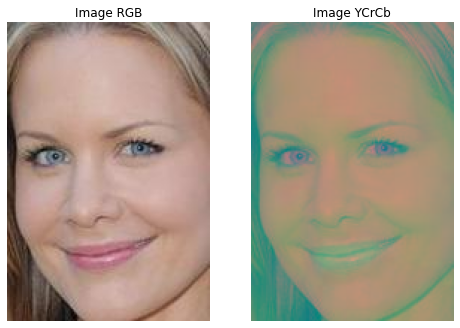

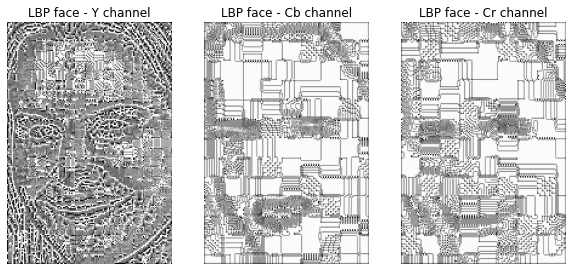

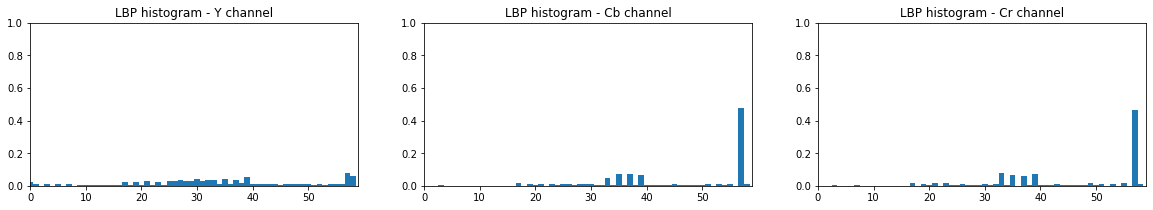

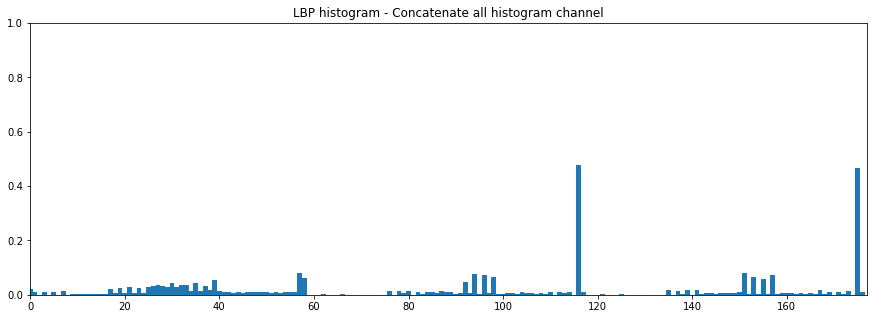

In [6]:
image_path = "TEST__4930_495656__74.jpg"
image = cv.imread(image_path)
image = cv.cvtColor(image, cv.COLOR_BGR2YCrCb)
lbp_y, y_h = lbp_histogram(image[:,:,0]) # y channel
lbp_cb, cb_h = lbp_histogram(image[:,:,1]) # cb channel
lbp_cr, cr_h = lbp_histogram(image[:,:,2]) # cr channel
feature = np.concatenate((y_h, cb_h, cr_h))

plt.figure(figsize=(8, 8))

ax = plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_YCrCb2RGB))
plt.title('Image RGB')
plt.axis("off")

ax = plt.subplot(1, 2, 2)
plt.imshow(image)
plt.title('Image YCrCb')
plt.axis("off")
plt.show()



plt.figure(figsize=(10, 6))

ax = plt.subplot(1, 3, 1)
plt.imshow(lbp_y, cmap='gray')
plt.title('LBP face - Y channel')
plt.axis("off")

ax = plt.subplot(1, 3, 2)
plt.imshow(lbp_cb, cmap='gray')
plt.title('LBP face - Cb channel')
plt.axis("off")

ax = plt.subplot(1, 3, 3)
plt.imshow(lbp_cr, cmap='gray')
plt.title('LBP face - Cr channel')
plt.axis("off")
plt.show()



plt.figure(figsize=(20, 3))

ax = plt.subplot(1, 3, 1)
plt.bar(np.arange(len(y_h)), y_h, width=1)
plt.axis([0, len(y_h), 0, 1])
plt.title('LBP histogram - Y channel')

ax = plt.subplot(1, 3, 2)
plt.bar(np.arange(len(cb_h)), cb_h, width=1)
plt.axis([0, len(cb_h), 0, 1])
plt.title('LBP histogram - Cb channel')

ax = plt.subplot(1, 3, 3)
plt.bar(np.arange(len(cr_h)), cr_h, width=1)
plt.axis([0, len(cr_h), 0, 1])
plt.title('LBP histogram - Cr channel')
plt.show()



feature = np.concatenate((y_h, cb_h, cr_h))
plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(feature)), feature, width=1)
plt.axis([0, len(feature), 0, 1])
plt.title('LBP histogram - Concatenate all histogram channel')
plt.show()

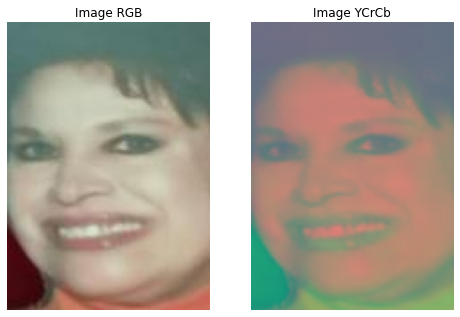

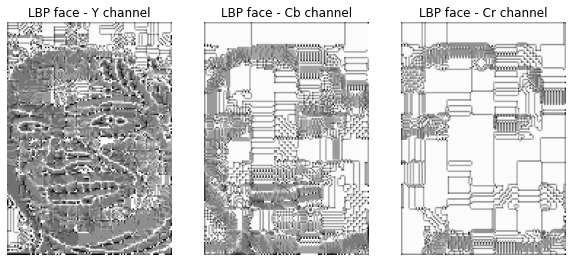

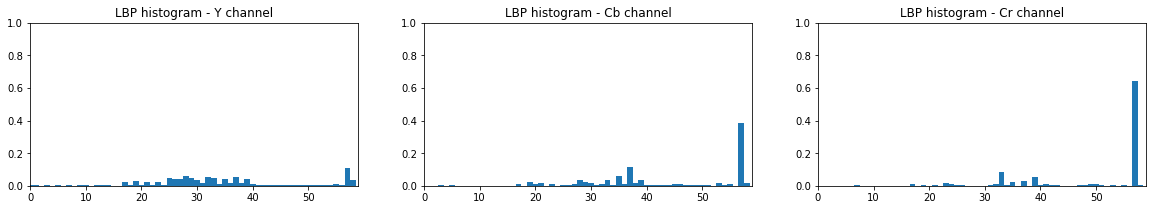

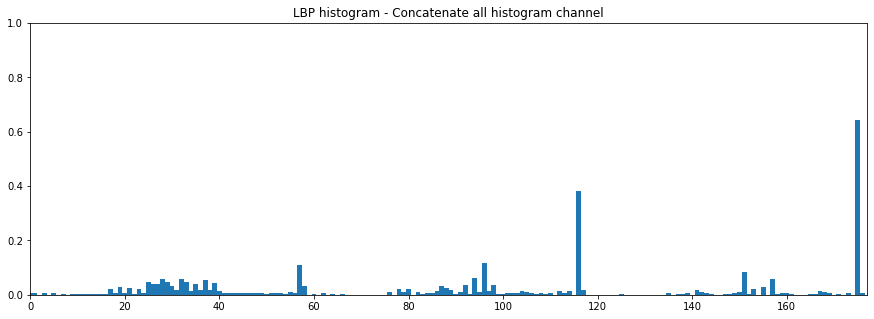

In [7]:
image_path = "TEST__3613_534926__8244.jpg"
image = cv.imread(image_path)
image = cv.cvtColor(image, cv.COLOR_BGR2YCrCb)
lbp_y, y_h = lbp_histogram(image[:,:,0]) # y channel
lbp_cb, cb_h = lbp_histogram(image[:,:,1]) # cb channel
lbp_cr, cr_h = lbp_histogram(image[:,:,2]) # cr channel
feature = np.concatenate((y_h, cb_h, cr_h))

plt.figure(figsize=(8, 8))

ax = plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_YCrCb2RGB))
plt.title('Image RGB')
plt.axis("off")

ax = plt.subplot(1, 2, 2)
plt.imshow(image)
plt.title('Image YCrCb')
plt.axis("off")
plt.show()



plt.figure(figsize=(10, 6))

ax = plt.subplot(1, 3, 1)
plt.imshow(lbp_y, cmap='gray')
plt.title('LBP face - Y channel')
plt.axis("off")

ax = plt.subplot(1, 3, 2)
plt.imshow(lbp_cb, cmap='gray')
plt.title('LBP face - Cb channel')
plt.axis("off")

ax = plt.subplot(1, 3, 3)
plt.imshow(lbp_cr, cmap='gray')
plt.title('LBP face - Cr channel')
plt.axis("off")
plt.show()



plt.figure(figsize=(20, 3))

ax = plt.subplot(1, 3, 1)
plt.bar(np.arange(len(y_h)), y_h, width=1)
plt.axis([0, len(y_h), 0, 1])
plt.title('LBP histogram - Y channel')

ax = plt.subplot(1, 3, 2)
plt.bar(np.arange(len(cb_h)), cb_h, width=1)
plt.axis([0, len(cb_h), 0, 1])
plt.title('LBP histogram - Cb channel')

ax = plt.subplot(1, 3, 3)
plt.bar(np.arange(len(cr_h)), cr_h, width=1)
plt.axis([0, len(cr_h), 0, 1])
plt.title('LBP histogram - Cr channel')
plt.show()



feature = np.concatenate((y_h, cb_h, cr_h))
plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(feature)), feature, width=1)
plt.axis([0, len(feature), 0, 1])
plt.title('LBP histogram - Concatenate all histogram channel')
plt.show()

# Sauvegarde des caractéristiques

In [10]:
# Création du features du train live
compute_lpb('Dataset_anti_spoofing/train/live/', 'Dataset_anti_spoofing/train/features_lbp_train_live', 'live')

Traitement en cour ...: 100%|██████████ [ time left: 00:00 ]


In [11]:
# Création du features du train spoof
compute_lpb('Dataset_anti_spoofing/train/spoof/', 'Dataset_anti_spoofing/train/features_lbp_train_spoof', 'spoof')

Traitement en cour ...: 100%|██████████ [ time left: 00:00 ]


In [12]:
# Création du features du test live
compute_lpb('Dataset_anti_spoofing/test/live/', 'Dataset_anti_spoofing/test/features_lbp_test_live', 'live')

Traitement en cour ...: 100%|██████████ [ time left: 00:00 ]


In [13]:
# Création du features du test spoof
compute_lpb('Dataset_anti_spoofing/test/spoof/', 'Dataset_anti_spoofing/test/features_lbp_test_spoof', 'spoof')

Traitement en cour ...: 100%|██████████ [ time left: 00:00 ]
